In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
import os
from pathlib import Path
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
file = Path("./Fish_Dataset")
File_Path = list(file.glob(r"**/*.png"))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],File_Path))

File_Path = pd.Series(File_Path).astype(str)
Labels = pd.Series(Labels)
df = pd.concat([File_Path,Labels],axis=1)
df.columns = ['image', 'label']
# Drop all the images that ends with (GT)
df = df[df["label"].apply(lambda x: x[-2:] != "GT")].reset_index(drop=True)

print('-'*70)
print(df.head())

print('='*70)
print(df["label"].value_counts())
print('-'*70)

----------------------------------------------------------------------
                                               image            label
0  Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...  Gilt-Head Bream
1  Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...  Gilt-Head Bream
2  Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...  Gilt-Head Bream
3  Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...  Gilt-Head Bream
4  Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/0...  Gilt-Head Bream
Red Mullet            1000
Trout                 1000
Shrimp                1000
Hourse Mackerel       1000
Gilt-Head Bream       1000
Black Sea Sprat       1000
Striped Red Mullet    1000
Sea Bass              1000
Red Sea Bream         1000
Name: label, dtype: int64
----------------------------------------------------------------------


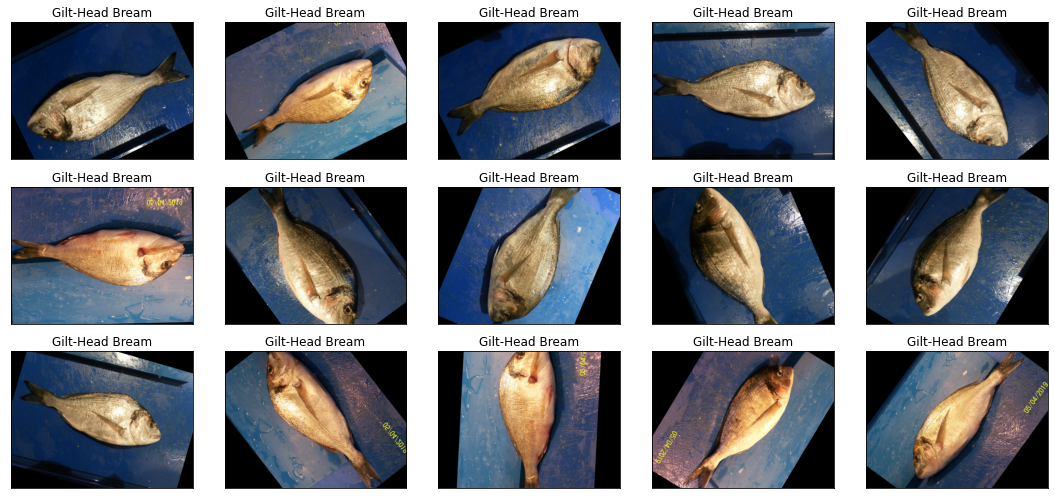

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax ,in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.tight_layout()
plt.show()

In [4]:
Train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

train_set, val_set = train_test_split(Train_set, test_size= 0.2, random_state = 42)

In [5]:
print(train_set.shape)
print(test_set.shape)
print(val_set.shape)

(5760, 2)
(1800, 2)
(1440, 2)


In [6]:
img_gen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input, 
    rescale=1/255)

In [7]:
train = img_gen.flow_from_dataframe(dataframe = train_set,
    x_col = 'image',
    y_col ='label', 
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',                                   
    batch_size = 32,
    shuffle = False 
)

Found 5760 validated image filenames belonging to 9 classes.


In [8]:
test = img_gen.flow_from_dataframe(dataframe = test_set,
    x_col = 'image', 
    y_col ='label', 
    target_size =(150, 150),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)

Found 1800 validated image filenames belonging to 9 classes.


In [9]:
val = img_gen.flow_from_dataframe(dataframe = val_set,
    x_col = 'image', 
    y_col ='label', 
    target_size =(150, 150),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)

Found 1440 validated image filenames belonging to 9 classes.


In [10]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = [150, 150, 3])) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=150, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=9, activation='softmax'))

print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 150)               6220950   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1

In [11]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = cnn.fit(train, validation_data = val, epochs=20)

Epoch 1/20
180/180 [==============================] - 126s 693ms/step - loss: 0.3898 - accuracy: 0.1443 - val_loss: 0.2967 - val_accuracy: 0.3604
Epoch 2/20
180/180 [==============================] - 121s 672ms/step - loss: 0.2749 - accuracy: 0.4191 - val_loss: 0.2320 - val_accuracy: 0.5312
Epoch 3/20
180/180 [==============================] - 140s 775ms/step - loss: 0.2087 - accuracy: 0.6145 - val_loss: 0.1673 - val_accuracy: 0.7021
Epoch 4/20
180/180 [==============================] - 135s 749ms/step - loss: 0.1578 - accuracy: 0.7304 - val_loss: 0.1474 - val_accuracy: 0.7444
Epoch 5/20
180/180 [==============================] - 125s 693ms/step - loss: 0.1256 - accuracy: 0.8040 - val_loss: 0.1033 - val_accuracy: 0.8410
Epoch 6/20
180/180 [==============================] - 130s 723ms/step - loss: 0.0829 - accuracy: 0.8835 - val_loss: 0.0844 - val_accuracy: 0.8743
Epoch 7/20
180/180 [==============================] - 132s 732ms/step - loss: 0.0625 - accuracy: 0.9204 - val_loss: 0.0798 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

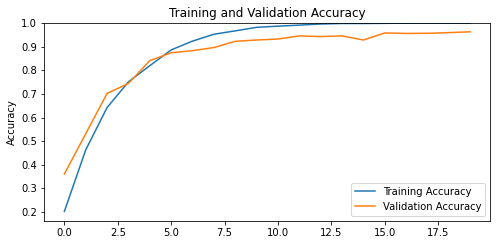

In [12]:
acc = history.history['accuracy'] # get history report of the model

val_acc = history.history['val_accuracy'] # get history of the validation set

loss = history.history['loss'] #get the history of the lossses recorded on the train set
val_loss = history.history['val_loss'] #get the history of the lossses recorded on the validation set

plt.figure(figsize=(8, 8)) # set figure size for the plot generated
plt.subplot(2, 1, 1) # a sup plot with 2 rows and 1 column

plt.plot(acc, label='Training Accuracy') #plot accuracy curve for each train run
plt.plot(val_acc, label='Validation Accuracy') #plot accuracy curve for each validation run

plt.legend(loc='lower right')
plt.ylabel('Accuracy') #label name for y axis
plt.ylim([min(plt.ylim()),1]) #set limit for y axis
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

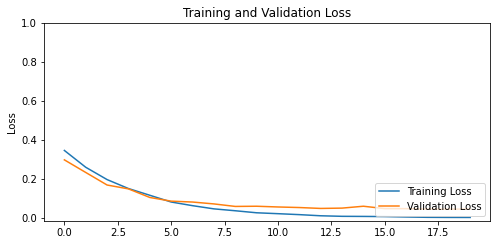

In [13]:
plt.figure(figsize=(8, 8)) # set figure size for the plot generated
plt.subplot(2, 1, 1) # a sup plot with 2 rows and 1 column

plt.plot(loss, label='Training Loss') #plot loss curve for each train run
plt.plot(val_loss, label='Validation Loss') #plot loss curve for each validation run

plt.legend(loc='lower right')
plt.ylabel('Loss') #label name for y axis
plt.ylim([min(plt.ylim()),1]) #set limit for y axis
plt.title('Training and Validation Loss')

In [15]:
pred = cnn.predict(test)
pred = np.argmax(pred,axis = 1) # pick the class with highest probability
# sequential model predicts by given probability for each of the classes
#np.argmax is called on the prediction to choose the class with the highest probability

# Map the label
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

In [16]:
from sklearn.metrics import classification_report, confusion_matrix # import metrics for evaluation

y_test = test_set.label # set y_test to the expected output

print(classification_report(y_test, pred2))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.95      0.99      0.97       191
   Gilt-Head Bream       0.92      0.93      0.93       195
   Hourse Mackerel       0.95      0.95      0.95       203
        Red Mullet       0.94      0.97      0.95       204
     Red Sea Bream       0.97      0.96      0.97       201
          Sea Bass       0.94      0.92      0.93       179
            Shrimp       0.97      0.97      0.97       211
Striped Red Mullet       0.98      0.94      0.96       207
             Trout       0.95      0.95      0.95       209

          accuracy                           0.95      1800
         macro avg       0.95      0.95      0.95      1800
      weighted avg       0.95      0.95      0.95      1800



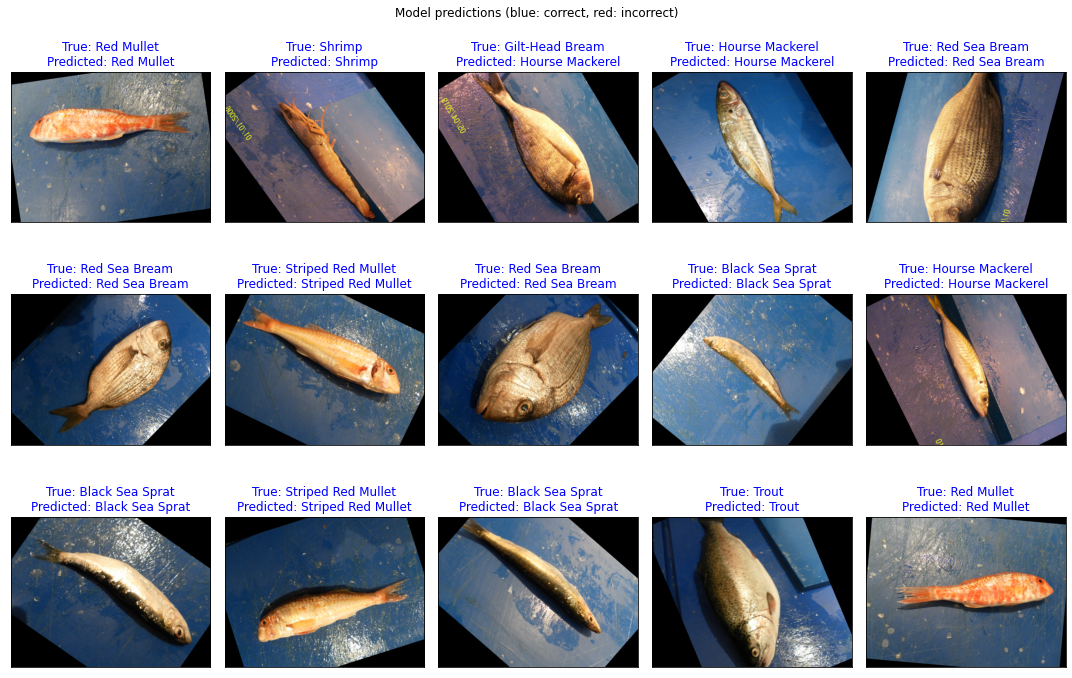

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

color = "blue" if pred2[i] == test_set.label.iloc[i] else "red"
for i, ax ,in enumerate(axes.flat):
    ax.imshow(plt.imread(test_set.image.iloc[i]))
    ax.set_title(f"True: {test_set.label.iloc[i]}\nPredicted: {pred2[i]}",color=color)
    
plt.subplots_adjust(hspace = 0.3)
plt.suptitle("Model predictions (blue: correct, red: incorrect)",y=0.98)
plt.tight_layout()
plt.show()